In [1]:
import scipy.io
import pdb
import sys
import h5py
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy.fftpack import fft, ifft

In [2]:
#Load .mat file
dir_file = '/home/anmol/projects/capstone/ODetect/data/TBME2013-PPGRR-Benchmark_R3/data/0009_8min.mat'
f = h5py.File(dir_file, 'r')

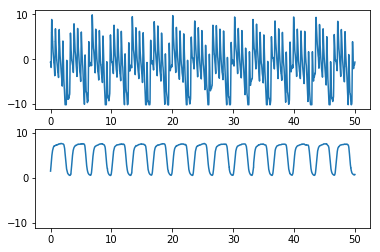

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
ax1.plot(np.arange(0,15000)/300.0, f['signal']['pleth']['y'][0][0:15000])
ax2.plot(np.arange(0,15000)/300.0, f['signal']['co2']['y'][0][0:15000])
plt.show()

[ 0.    0.03  0.06  0.09  0.12  0.15  0.18  0.21  0.24  0.27  0.3   0.33
  0.36  0.39  0.42  0.45  0.48  0.51  0.54  0.57  0.6   0.63  0.66  0.69
  0.72  0.75  0.78  0.81  0.84  0.87  0.9   0.93  0.96  0.99  1.02  1.05
  1.08  1.11  1.14  1.17  1.2   1.23  1.26  1.29  1.32  1.35  1.38  1.41
  1.44  1.47  1.5   1.53  1.56  1.59  1.62  1.65  1.68  1.71  1.74  1.77
  1.8   1.83  1.86  1.89  1.92  1.95  1.98  2.01  2.04  2.07  2.1   2.13
  2.16  2.19  2.22  2.25  2.28  2.31  2.34  2.37  2.4   2.43  2.46  2.49
  2.52  2.55  2.58  2.61  2.64  2.67  2.7   2.73  2.76  2.79  2.82  2.85
  2.88  2.91  2.94  2.97] [   0.           16.66666667   33.33333333   50.           66.66666667
   83.33333333  100.          116.66666667  133.33333333  150.
  166.66666667  183.33333333  200.          216.66666667  233.33333333
  250.          266.66666667  283.33333333  300.          316.66666667
  333.33333333  350.          366.66666667  383.33333333  400.
  416.66666667  433.33333333  450.          466.666

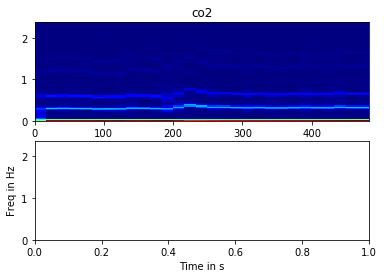

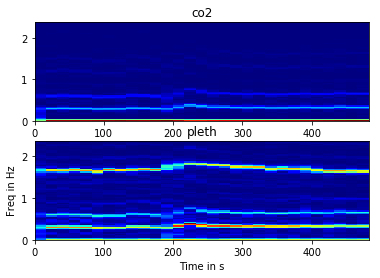

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
freq, t, Zxx = signal.stft(f['signal']['co2']['y'][0][0:1500000], 300.0, nperseg=10000)
print(freq[0:100],t)
plt.xlabel('Time in s')
plt.ylabel('Freq in Hz')
ax1.set_title('co2')
ax1.pcolormesh(t, freq[0:80], np.abs(Zxx[0:80]), cmap="jet")
freq, t, Zxx = signal.stft(f['signal']['pleth']['y'][0][0:1500000], 300.0, nperseg=10000)
print(freq[0:100],t)
ax2.pcolormesh(t, freq[0:80], np.abs(Zxx[0:80]), cmap="jet")
ax2.set_title('pleth')
plt.show()

In [13]:
freq[0:80]


array([ 0.  ,  0.03,  0.06,  0.09,  0.12,  0.15,  0.18,  0.21,  0.24,
        0.27,  0.3 ,  0.33,  0.36,  0.39,  0.42,  0.45,  0.48,  0.51,
        0.54,  0.57,  0.6 ,  0.63,  0.66,  0.69,  0.72,  0.75,  0.78,
        0.81,  0.84,  0.87,  0.9 ,  0.93,  0.96,  0.99,  1.02,  1.05,
        1.08,  1.11,  1.14,  1.17,  1.2 ,  1.23,  1.26,  1.29,  1.32,
        1.35,  1.38,  1.41,  1.44,  1.47,  1.5 ,  1.53,  1.56,  1.59,
        1.62,  1.65,  1.68,  1.71,  1.74,  1.77,  1.8 ,  1.83,  1.86,
        1.89,  1.92,  1.95,  1.98,  2.01,  2.04,  2.07,  2.1 ,  2.13,
        2.16,  2.19,  2.22,  2.25,  2.28,  2.31,  2.34,  2.37])

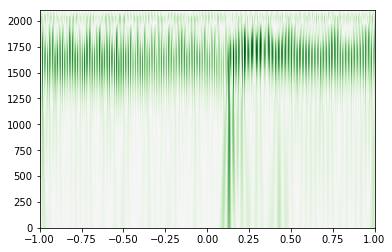

In [9]:
widths = np.arange(1, 110)*10
cwtmatr = signal.cwt(f['signal']['pleth']['y'][0][0:100000], signal.ricker, widths)
plt.imshow(np.abs(cwtmatr), extent=[-1, 1, 1, 2100], cmap='PRGn', aspect='auto', vmax=np.abs(cwtmatr).max(), vmin=-np.abs(cwtmatr).max())
plt.show()